# Reconocimiento de dígitos con KNN

Veamos como interactuar con las clases implementadas en el módulo de C++ haciendo una experimentación muy simplificada, y a modo de ejemplo, del método KNN para reconocer digitos

## Compilando el módulo desde C++

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [2]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/tincho/Development/tp2 gitlab/tp2/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/tincho/Development/tp2 gitlab/mn-tp2
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tincho/Development/tp2 

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/tincho/Development/tp2 gitlab/mn-tp2/notebooks
Python 3.8.10


In [4]:
import numpy as np
# Nos va a servir para funciones que contengan elementos algebraicos

## Explorando los datos

In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")
# df_trainBis = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [5]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [7]:
df_train = df_train[:5000]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [8]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((5000, 784), (5000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 7


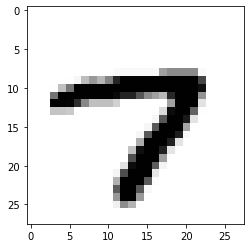

In [9]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [10]:
df_train["label"].value_counts(normalize=True)

1    0.1116
2    0.1090
6    0.1032
7    0.1012
0    0.0988
3    0.0960
9    0.0956
4    0.0954
8    0.0954
5    0.0938
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [11]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


Ahora tengo 4000 instancias de entrenamiento y 1000 de validación


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)


In [13]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


Accuracy: 0.832
CPU times: user 3.5 s, sys: 0 ns, total: 3.5 s
Wall time: 3.5 s


# Empiezo con la investigación 

## Implementación de 'k'

#### Vamos a experimentar la variación de datos de 'k' y 'alfa' utilizando como método el KFold Cross Validation. Lo que hace es dividir nuestra muestra de datos en 'K' subconjuntos, y bajo una métrica que elijamos, aplicarle el kNN primero sin PCA (luego con PCA), para luego chequear sus resultados.

#### Agarro una muestra pequeña del train ya provisto por la cátedra

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from time import time

df_train_small = df_train.sample(1000) # Empiezo usando 1000 datos primero
df_train_small.shape

X_train = df_train_small[df_train_small.columns[1:]].values
y_train = df_train_small["label"].values

print(X_train.shape)
print(y_train.shape)

(1000, 784)
(1000,)


#### Comienzo con una funcion de KFold que me estime la performance de los métodos codeados en C++ Utilizamos un K = 10 porque es el numero estandar que se utiliza en machine learning.

In [15]:
def KFoldKNN(k, X, y):
    kfold = KFold(10)
    accuracyArr = []
    F1Arr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        # Metodo kNN
        kNN = metnum.KNNClassifier(k)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        
        accuracyArr.append(acc)
        F1Arr.append(f1)
        
    accuracyArr = np.asarray(accuracyArr)
    F1Arr = np.asarray(F1Arr)
    
    mediaAccuracy = np.mean(accuracyArr)
    mediaF1 = np.mean(F1Arr)
    
    return mediaAccuracy, mediaF1

## Variacion de 'k' sin PCA

#### 'k' = 1 a 10

In [17]:
def estudio_k(k, X, y):
    accuracyList = []
    F1List = []
    for i in range(1, k):
        mediaAccuracy, mediaF1 = KFoldKNN(int(i), X, y)
        accuracyList.append(mediaAccuracy)
        F1List.append(mediaF1)

    accuracyList = np.asarray(accuracyList)
    F1List = np.asarray(F1List)
    
    return accuracyList, F1List

In [29]:
%%time 
accuracy10 , FOne10 = estudio_k(10, X_train, y_train)

CPU times: user 6.73 s, sys: 0 ns, total: 6.73 s
Wall time: 6.73 s


#### Graficamos la comparación entre la métricas 'Accuracy' y 'F1'

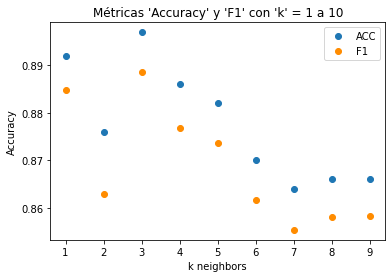

In [75]:
from matplotlib import pyplot

pyplot.errorbar(range(1, 10), accuracy10, fmt='o', label='ACC')
pyplot.errorbar(range(1, 10), FOne10, fmt='o',color='darkorange', label='F1')
pyplot.legend(loc='upper right')
pyplot.xlabel("k neighbors")
pyplot.ylabel("Accuracy")
pyplot.title("Métricas 'Accuracy' y 'F1' con 'k' = 1 a 10")
plt.savefig("Imagenes/k10_accf1.png")
# show the plot
pyplot.show()

#### 'k' = 1 a 100

In [25]:
%%time #Tarda un minuto aproximadamente
accuracy100 , FOne100 = estudio_k(100, X_train, y_train)

CPU times: user 1min 14s, sys: 22.7 ms, total: 1min 14s
Wall time: 1min 14s


#### Graficamos la performance de la métrica 'Accuracy' con 'k = 100'

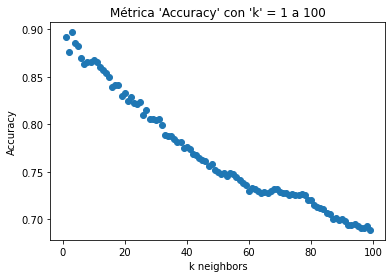

In [77]:
pyplot.errorbar(range(1, 100), accuracy100, fmt='o')

pyplot.xlabel("k neighbors")
pyplot.ylabel("Accuracy")
pyplot.title("Métrica 'Accuracy' con 'k' = 1 a 100")
# show the plot
pyplot.show()

#### Graficamos la performance de la métrica 'F1' con 'k = 100'

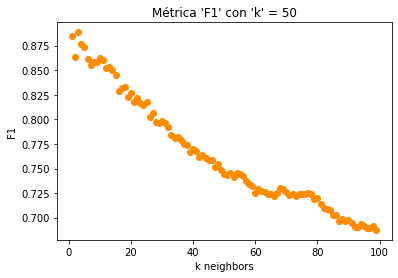

In [78]:
pyplot.errorbar(range(1, 100), FOne100, fmt='o', color='darkorange')

pyplot.xlabel("k neighbors")
pyplot.ylabel("F1")
pyplot.title("Métrica 'F1' con 'k' = 50")

# show the plot
pyplot.show()

#### Graficamos cómo rinden ambos métodos con 'k = 100'

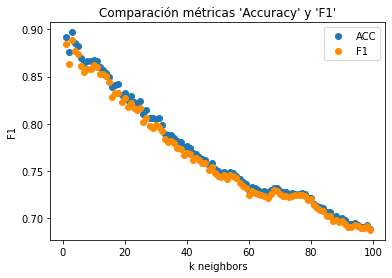

In [79]:
pyplot.errorbar(range(1, 100), accuracy100, fmt='o', label='ACC')
pyplot.errorbar(range(1, 100), FOne100, fmt='o', color='darkorange', label='F1')
pyplot.legend(loc='upper right')
pyplot.xlabel("k neighbors")
pyplot.ylabel("F1")
pyplot.title("Comparación métricas 'Accuracy' y 'F1'")
plt.savefig("Imagenes/k100_accf1.png")
# show the plot
pyplot.show()

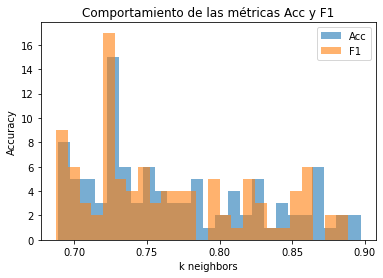

In [81]:
plt.hist(accuracy100, 25, alpha = 0.6, label='Acc')
plt.hist(FOne100, 25, alpha = 0.6, label='F1')
plt.legend(loc='best')
plt.title('Comportamiento de las métricas Acc y F1')
plt.ylabel('Accuracy')
plt.xlabel('k neighbors')
plt.savefig("Imagenes/k100_accf1bis.png")

plt.show()

## Variación de tamaño de la muestra

#### Vamos a buscar como varía la accuracy dependiendo del tamaño de la muestra que tenemos. Eligiremos 'k = 1 a 50' y 'alfa = 20'.

### Con PCA

In [25]:
# No se por que el kernel se muere cuando hago esta funcion
def muestra(cant):
    df_train_custom = df_trainBis.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

#### M = 500

In [122]:
%%time

df_trainBis = df_train

df_train_500 = df_trainBis.sample(500)
X_500 = df_train_500[df_train_500.columns[1:]].values
y_500 = df_train_500["label"].values


PCAMuestra = metnum.PCA(20)
PCAMuestra.fit(X_500)
X_500 = PCAMuestra.transform(X_500)
accuracyI , FOneI = estudio_k(50, X_500, y_500)

CPU times: user 1.3 s, sys: 33 µs, total: 1.3 s
Wall time: 1.3 s


#### M = 1000

In [123]:
%%time

df_train_1000 = df_trainBis.sample(1000)
X_1000 = df_train_1000[df_train_1000.columns[1:]].values
y_1000 = df_train_1000["label"].values

PCAMuestra.fit(X_1000)
X_1000 = PCAMuestra.transform(X_1000)
accuracyII , FOneII = estudio_k(50, X_1000, y_1000)

CPU times: user 1.78 s, sys: 22 µs, total: 1.78 s
Wall time: 1.78 s


#### M = 2500

In [124]:
%%time

df_train_2500 = df_trainBis.sample(2500)
X_2500 = df_train_2500[df_train_2500.columns[1:]].values
y_2500 = df_train_2500["label"].values

PCAMuestra.fit(X_2500)
X_2500 = PCAMuestra.transform(X_2500)
accuracyIII , FOneIII = estudio_k(50, X_2500, y_2500)

CPU times: user 6.09 s, sys: 0 ns, total: 6.09 s
Wall time: 6.09 s


#### M = 5000

In [125]:
%%time

df_train_5000 = df_trainBis.sample(5000)
X_5000 = df_train_5000[df_train_5000.columns[1:]].values
y_5000 = df_train_5000["label"].values

PCAMuestra.fit(X_5000)
X_5000 = PCAMuestra.transform(X_5000)
accuracyIV, FOneIV = estudio_k(50, X_5000, y_5000)

CPU times: user 19.8 s, sys: 19.7 ms, total: 19.8 s
Wall time: 19.8 s


#### Grafico todos los tipos de muestra para ver en que se diferencia su performance 

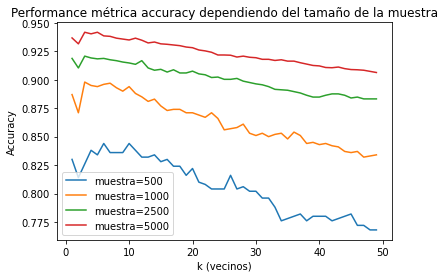

<Figure size 432x288 with 0 Axes>

In [129]:
rangoMuestra = range(1, 50)
plt.plot(rangoMuestra, accuracyI, label='muestra=500')
plt.plot(rangoMuestra, accuracyII, label='muestra=1000')
plt.plot(rangoMuestra, accuracyIII, label='muestra=2500')
plt.plot(rangoMuestra, accuracyIV, label='muestra=5000')
plt.xlabel("k (vecinos)")
plt.ylabel("Accuracy")
#plt.xticks(rangoMuestra)
plt.title("Performance métrica accuracy dependiendo del tamaño de la muestra")
leg = plt.legend(loc='lower left')
plt.show()
plt.savefig("Imagenes/muestra.png")

### Tabla de tiempos de muestra

### Con PCA

## Variación de '$\alpha$'

#### Estudiamos cómo cambia la efectividad del método kNN (con k = 1 y k = 100) dependiendo el alfa

In [30]:
def estudio_alfa(a, k, X, y):
    accuracyList = []
    F1List = []
    for i in range(1, a):
        # Realizo redimension
        PCA = metnum.PCA(int(i))
        PCA.fit(X)
        X_PCA_train = PCA.transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy, mediaF1 = KFoldKNN(k, X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        F1List.append(mediaF1)

    accuracyList = np.asarray(accuracyList)
    F1List = np.asarray(F1List)
    
    return accuracyList, F1List

In [140]:
# Rehicimos las funciones porque las anteriores nos podian dar un sesgo y aca realizamos la transformacion despues de los folds
def KFoldAlfa(k, a, X, y):
    kfold = KFold(10)
    accuracyArr = []
    F1Arr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        PCA = metnum.PCA(int(a))
        PCA.fit(X_train)
        X_PCA_train = PCA.transform(X_train)
        
        # Metodo kNN
        kNN = metnum.KNNClassifier(k)
        
        kNN.fit(X_PCA_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        
        accuracyArr.append(acc)
        F1Arr.append(f1)
        
    accuracyArr = np.asarray(accuracyArr)
    F1Arr = np.asarray(F1Arr)
    
    mediaAccuracy = np.mean(accuracyArr)
    mediaF1 = np.mean(F1Arr)
    
    return mediaAccuracy, mediaF1

In [141]:
# Rehicimos las funciones porque las anteriores nos podian dar un sesgo y aca realizamos la transformacion despues de los folds
def estudio_alfa_bis(a, k, X, y):
    accuracyList = []
    F1List = []
    for i in range(1, a):
        # Realizo redimension
        PCA = metnum.PCA(int(i))
        PCA.fit(X)
        X_PCA_train = PCA.transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy, mediaF1 = KFoldAlfa(k, a, X, y)
        accuracyList.append(mediaAccuracy)
        F1List.append(mediaF1)

    accuracyList = np.asarray(accuracyList)
    F1List = np.asarray(F1List)
    
    return accuracyList, F1List

### PCA con k = 1

#### Comienzo con un alfa chico como '5'

In [31]:
%%time
accuracyAlpha5 , FOneAlpha5 = estudio_alfa(5, 1, X_train, y_train)

CPU times: user 557 ms, sys: 0 ns, total: 557 ms
Wall time: 556 ms


#### Graficamos la performance de la métrica 'Accuracy' con 'alfa = 5'

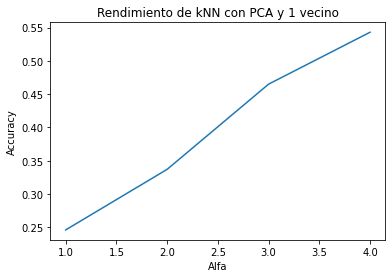

In [32]:
plt.title("Rendimiento de kNN con PCA y 1 vecino")
plt.plot(range(1, 5), accuracyAlpha5)
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.show()

#### Graficamos la performance de la métrica 'F1' con 'alfa = 5'

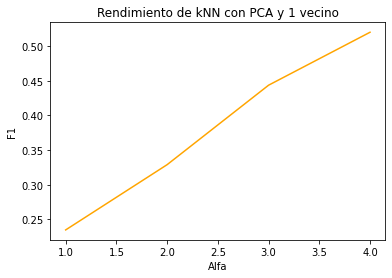

In [33]:
plt.title("Rendimiento de kNN con PCA y 1 vecino")
plt.plot(range(1, 5), FOneAlpha5, color="orange")
plt.xlabel("Alfa")
plt.ylabel("F1")
plt.show()

#### Ahora utilizo un alfa de 50

In [34]:
%%time
accuracyAlpha50 , FOneAlpha50 = estudio_alfa(50, 1, X_train, y_train)

CPU times: user 47.1 s, sys: 7.78 ms, total: 47.1 s
Wall time: 47.1 s


In [83]:
%%time
accuracyAlpha100 , FOneAlpha100 = estudio_alfa(100, 1, X_train, y_train)

CPU times: user 5min 4s, sys: 290 ms, total: 5min 4s
Wall time: 5min 4s


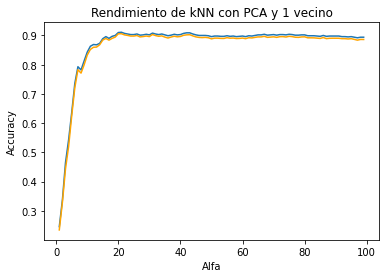

In [86]:
plt.title("Rendimiento de kNN con PCA y 1 vecino")
plt.plot(range(1, 100), accuracyAlpha100)
plt.plot(range(1, 100), FOneAlpha100, color="orange")
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.show()

#### Graficamos la performance ambas métricas con 'alfa' de 1 a 50

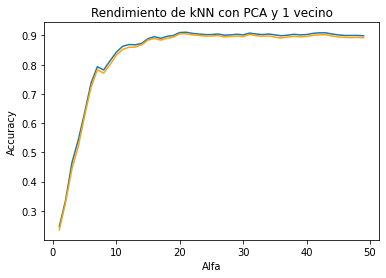

In [35]:
plt.title("Rendimiento de kNN con PCA y 1 vecino")
plt.plot(range(1, 50), accuracyAlpha50)
plt.plot(range(1, 50), FOneAlpha50, color="orange")
plt.xlabel("Alfa")
plt.ylabel("Accuracy")

plt.show()

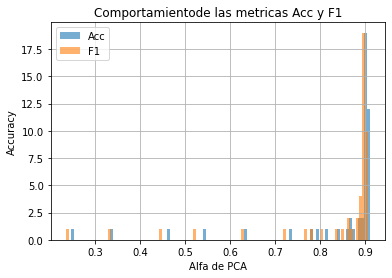

In [36]:
plt.hist(accuracyAlpha50, 100, alpha = 0.6, label='Acc')
plt.hist(FOneAlpha50, 100, alpha = 0.6, label='F1')
plt.legend(loc='upper left')
plt.title('Comportamientode las metricas Acc y F1')
plt.ylabel('Accuracy')
plt.xlabel('Alfa de PCA')
plt.grid()

plt.show()

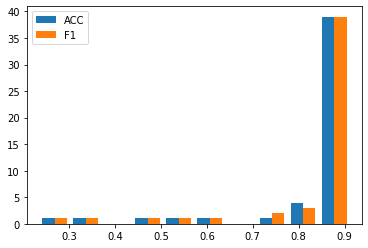

In [37]:
plt.hist([accuracyAlpha50, FOneAlpha50], label=['ACC', 'F1'])
plt.legend(loc='upper left')
plt.show()

### PCA con k = 100 y alfa de 1 a 50

In [38]:
%%time
accuracyAlpha50Bis, FOneAlpha50Bis = estudio_alfa(50, 100, X_train, y_train)

CPU times: user 51.5 s, sys: 15.9 ms, total: 51.5 s
Wall time: 51.5 s


#### Comparamos el rendimiento de nuestras métricas con "k en 1 y alfa en 50" vs "k en 100 y alfa en 50"

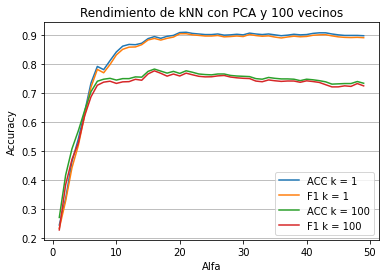

<Figure size 432x288 with 0 Axes>

In [139]:
plt.title("Rendimiento de kNN con PCA y 100 vecinos")
plt.plot(range(1, 50), accuracyAlpha50, label='ACC k = 1')
plt.plot(range(1, 50), FOneAlpha50, label='F1 k = 1')

plt.plot(range(1, 50), accuracyAlpha50Bis, label='ACC k = 100')
plt.plot(range(1, 50), FOneAlpha50Bis, label='F1 k = 100')

plt.legend(loc='best')

plt.grid(axis='y')
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("Imagenes/alfa_k1_k100.png")

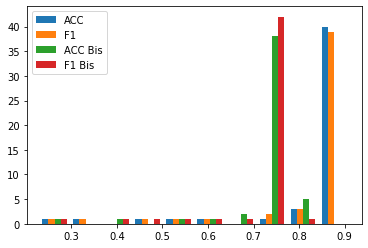

In [40]:
plt.hist([accuracyAlpha50, FOneAlpha50, accuracyAlpha50Bis, FOneAlpha50Bis], label=['ACC', 'F1', 'ACC Bis', 'F1 Bis'])
plt.legend(loc='upper left')
plt.show()

## Variación de 'k' con PCA

In [48]:
def estudio_k_alfa(k, a, X, y):
    accuracyList = []
    F1List = []
    PCA = metnum.PCA(a)
    PCA.fit(X)
    X_PCA_train = PCA.transform(X)
    for i in range(1, k):
        mediaAccuracy, mediaF1 = KFoldKNN(int(i), X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        F1List.append(mediaF1)

    accuracyList = np.asarray(accuracyList)
    F1List = np.asarray(F1List)
    
    return accuracyList, F1List

In [49]:
%%time
a50I , f50I = estudio_k(50, X_train, y_train)

CPU times: user 37.4 s, sys: 0 ns, total: 37.4 s
Wall time: 37.4 s


In [67]:
%%time
a50 , f50 = estudio_k_alfa(50, 20, X_train, y_train)

CPU times: user 1.98 s, sys: 0 ns, total: 1.98 s
Wall time: 1.97 s


In [51]:
%%time
a50bis , f50bis = estudio_k_alfa(50, 50, X_train, y_train)

CPU times: user 4.55 s, sys: 15.5 ms, total: 4.57 s
Wall time: 4.55 s


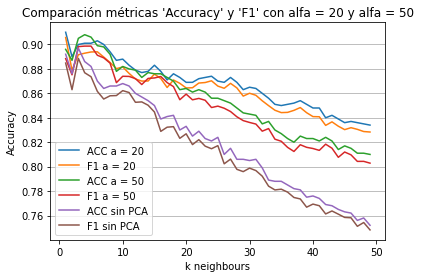

In [134]:
rango = range(1, 50)
plt.plot(rango, a50, label='ACC a = 20')
plt.plot(rango, f50, label='F1 a = 20')

plt.plot(rango, a50bis, label='ACC a = 50')
plt.plot(rango, f50bis, label='F1 a = 50')

plt.plot(rango, a50I, label='ACC sin PCA')
plt.plot(rango, f50I, label='F1 sin PCA')

plt.legend(loc='best')
plt.title("Comparación métricas 'Accuracy' y 'F1' con alfa = 20 y alfa = 50")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

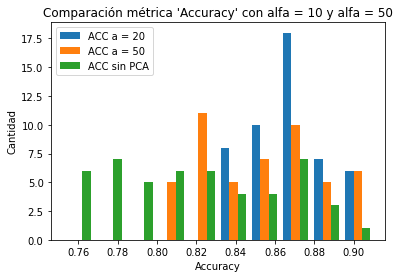

In [136]:
plt.title("Comparación métrica 'Accuracy' con alfa = 10 y alfa = 50")
plt.hist([a50, a50bis, a50I], label=['ACC a = 20', 'ACC a = 50', 'ACC sin PCA'])
plt.legend(loc='best')
plt.xlabel("Accuracy")
plt.ylabel("Cantidad")
plt.show()

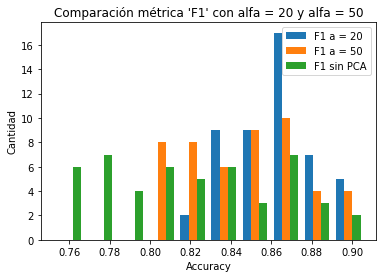

In [135]:
plt.title("Comparación métrica 'F1' con alfa = 20 y alfa = 50")
plt.hist([f50, f50bis, a50I], label=['F1 a = 20', 'F1 a = 50', 'F1 sin PCA'])
plt.legend(loc='best')
plt.xlabel("Accuracy")
plt.ylabel("Cantidad")
plt.show()

In [137]:
%%time
a50_4 , f50_4 = estudio_k_alfa(50, 4, X_train, y_train)

CPU times: user 926 ms, sys: 9 µs, total: 926 ms
Wall time: 926 ms


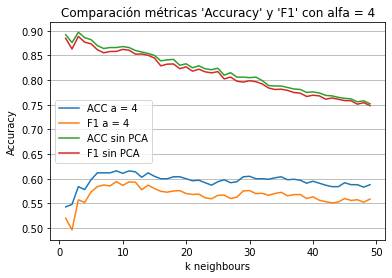

In [138]:
rango = range(1, 50)
plt.plot(rango, a50_4, label='ACC a = 4')
plt.plot(rango, f50_4, label='F1 a = 4')

plt.plot(rango, a50I, label='ACC sin PCA')
plt.plot(rango, f50I, label='F1 sin PCA')

plt.legend(loc='best')
plt.title("Comparación métricas 'Accuracy' y 'F1' con alfa = 4")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

## Variación de 'K' del KFold

In [55]:
# Con 25 vecinos
def KFoldVariado(K, X, y):
    # No confundir K de K-fold con k de kNN!!
    kfold = KFold(K)
    accuracyArr = []
    F1Arr = []
    minAccuracy = []
    maxAccuracy = []
    minF1 = []
    maxF1 = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        kNN = metnum.KNNClassifier(25)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        
        accuracyArr.append(acc)
        F1Arr.append(f1)
        
    accuracyArr = np.asarray(accuracyArr)
    F1Arr = np.asarray(F1Arr)
    
    mediaAccuracy = np.mean(accuracyArr)
    minAccuracy = np.min(accuracyArr)
    maxAccuracy = np.max(accuracyArr)
    
    mediaF1 = np.mean(F1Arr)
    minF1 = np.min(F1Arr)
    maxF1 = np.max(F1Arr)
    
    return mediaAccuracy, mediaF1, minAccuracy, maxAccuracy, minF1, maxF1

In [56]:
def estudio_K_de_KFold(K, X, y):
    accuracyList = []
    minAccList = []
    maxAccList = []
    F1List = []
    minF1List = []
    maxF1List = []
    for i in range(2, K):
        mediaAccuracy, mediaF1, minAccuracy, maxAccuracy, minF1, maxF1 = KFoldVariado(int(i), X, y)
        # Accuracy
        accuracyList.append(mediaAccuracy)
        minAccList.append(mediaAccuracy - minAccuracy)
        maxAccList.append(maxAccuracy - mediaAccuracy)
        
        #Efe Uno
        F1List.append(mediaF1)
        minF1List.append(mediaF1 - minF1)
        maxF1List.append(maxF1 - mediaF1)
    
    return accuracyList, minAccList, maxAccList, F1List, minF1List, maxF1List

#### Con K = 10

In [57]:
%%time
accuracyKFold10, minaccuracyKFold10, maxaccuracyKFold10, FOneKFold10, minFOneKFold10, maxFOneKFold10 = estudio_K_de_KFold(10, X_train, y_train)

CPU times: user 4.97 s, sys: 3.98 ms, total: 4.97 s
Wall time: 4.97 s


#### Comparamos como la cantidad de folds afecta a cada metodo en particular. Nos centramos no solo en la accuracy media, sino también en la accuracy máxima y mínima que un fold puede obtener. Vemos qué método tiene menos variación entre sus resultados y cuál más.

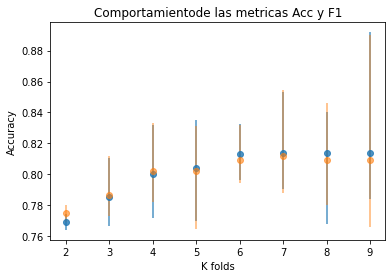

In [87]:
#Grafico métrica Accuracy con variacion del K de KFold
folds10 = range(2,10)

plt.title('Comportamientode las metricas Acc y F1')
plt.ylabel('Accuracy')
plt.xlabel('K folds')

pyplot.errorbar(folds10, accuracyKFold10, yerr=[minaccuracyKFold10, maxaccuracyKFold10], fmt='o', alpha = 0.8)
pyplot.errorbar(folds10, FOneKFold10, yerr=[minFOneKFold10, maxFOneKFold10], fmt='o', alpha = 0.6)

plt.savefig("Imagenes/KFold10.png")

#### Con K = 50

In [59]:
%%time
accuracyKFold50, minaccuracyKFold50, maxaccuracyKFold50, FOneKFold50, minFOneKFold50, maxFOneKFold50 = estudio_K_de_KFold(50, X_train, y_train)

CPU times: user 41 s, sys: 705 ms, total: 41.7 s
Wall time: 42.3 s


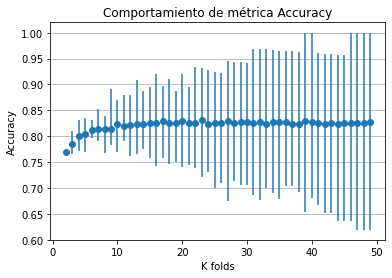

In [102]:
#Grafico metrica Accuracy con variacion del K de KFold
folds50 = range(2,50)

plt.title('Comportamiento de métrica Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K folds')

pyplot.errorbar(folds50, accuracyKFold50, yerr=[minaccuracyKFold50, maxaccuracyKFold50], fmt='o')


plt.grid(axis='y')
plt.ylim((0.6,1.02))
plt.savefig("Imagenes/accKFold50.png")

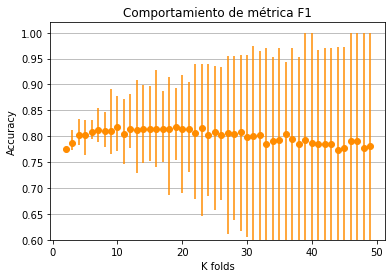

In [96]:
#Grafico metrica F1 con variacion del K de KFold
folds50 = range(2,50)

plt.title('Comportamiento de métrica F1')
plt.ylabel('Accuracy')
plt.xlabel('K folds')
pyplot.errorbar(folds50, FOneKFold50, yerr=[minFOneKFold50, maxFOneKFold50], fmt='o', color= 'darkorange')
plt.ylim((0.6,1.02))
plt.grid(axis='y')

plt.savefig("Imagenes/F1KFold50.png")

<ErrorbarContainer object of 3 artists>

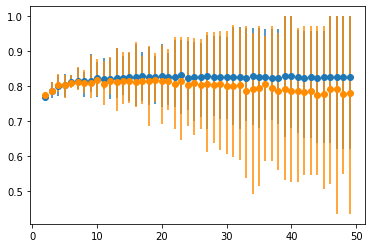

In [97]:
pyplot.errorbar(folds50, accuracyKFold50, yerr=[minaccuracyKFold50, maxaccuracyKFold50], fmt='o')
pyplot.errorbar(folds50, FOneKFold50, yerr=[minFOneKFold50, maxFOneKFold50], fmt='o', color= 'darkorange')

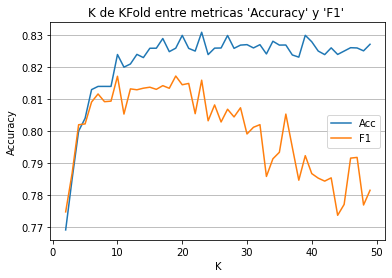

<Figure size 432x288 with 0 Axes>

In [111]:
plt.title("K de KFold entre metricas 'Accuracy' y 'F1' ")
plt.plot(folds50, accuracyKFold50, label='Acc')
plt.plot(folds50, FOneKFold50, label='F1')
plt.legend(loc='center right')
plt.grid(axis='y')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

plt.savefig("Imagenes/KFold1dasdsasdds0.png")

#### Con K = 100

In [112]:
%%time
accuracyKFold100, minaccuracyKFold100, maxaccuracyKFold100, FOneKFold100, minFOneKFold100, maxFOneKFold100 = estudio_K_de_KFold(100, X_train, y_train)

CPU times: user 1min 39s, sys: 47 ms, total: 1min 39s
Wall time: 1min 39s


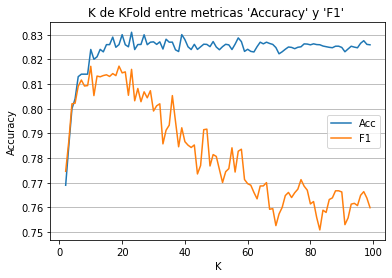

<Figure size 432x288 with 0 Axes>

In [114]:
folds100 = range(2,100)

plt.title("K de KFold entre metricas 'Accuracy' y 'F1' ")
plt.plot(folds100, accuracyKFold100, label='Acc')
plt.plot(folds100, FOneKFold100, label='F1')
plt.legend(loc='center right')
plt.grid(axis='y')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("Imagenes/blabla.png")

(0.3, 1.05)

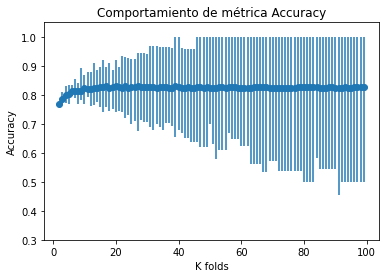

In [106]:
#Grafico metrica Accuracy con variacion del K = 100 de KFold
plt.title('Comportamiento de métrica Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K folds')

pyplot.errorbar(folds100, accuracyKFold100, yerr=[minaccuracyKFold100, maxaccuracyKFold100], fmt='o')
plt.ylim((0.3,1.05))

(0.3, 1.05)

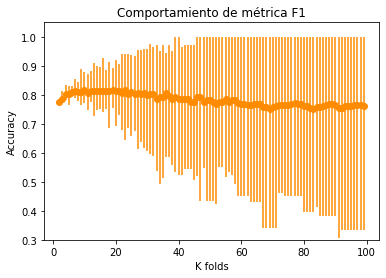

In [105]:
#Grafico metrica F1 con variacion del K = 100 de KFold
plt.title('Comportamiento de métrica F1')
plt.ylabel('Accuracy')
plt.xlabel('K folds')

pyplot.errorbar(folds100, FOneKFold100, yerr=[minFOneKFold100, maxFOneKFold100], fmt='o', color= 'darkorange')
plt.ylim((0.3,1.05))

## Fin